<a href="https://colab.research.google.com/github/yiwenwangANU/pytorch_learning/blob/main/01_pytorch_workflow_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Training and Testing Data

In [2]:
# unsqueeze add additional [] to certain dim
X = torch.arange(0, 1, 0.02).unsqueeze(1)
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [3]:
weight = 0.7
bias = 0.3
y = weight * X + bias
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

In [4]:
# train test split
split = int(len(X)*0.8)
# take the first 80% of data of X and y to form the training set
X_train, y_train = X[:split],y[:split]
# take the rest of data of X and y to form the training set
X_test, y_test = X[split:], y[split:]
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

##Data visualization

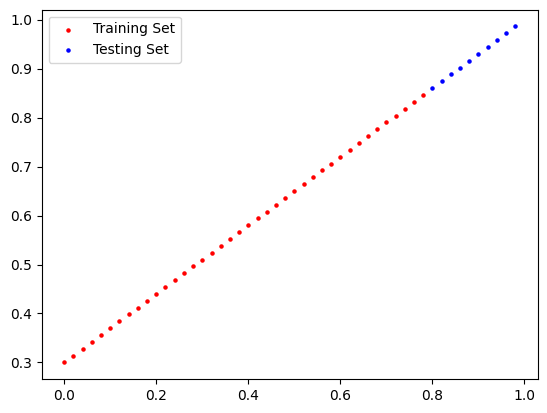

In [5]:
# plot to visualize the training set, testing set and predictions
def plot_prediction(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_pred=None):
    plt.scatter(X_train, y_train, c='r', s=5,label='Training Set')
    plt.scatter(X_test, y_test, c='b',s=5, label='Testing Set')
    if(y_pred is not None):
      plt.scatter(X_test, y_pred, c='g', s=5, label='Prediction')
    plt.legend()
    plt.show()

plot_prediction()

##Build the model

In [6]:
# build the model that inherit from nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # initialize the parms with random values
    self.weights = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  # define the forward method that create output from input
  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.weights * x + self.bias

# set random seed to make sure getting the same result in every run
torch.manual_seed(42)
model = LinearRegressionModel()

In [7]:
# check the params in model by state_dict()
# params are random initially
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Choose Loss function and Optimizer

In [8]:
# choose the loss function, L1Loss is MAE
loss_fn = nn.L1Loss()
# choose optimizer, SGD or Adam is OK in this model
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

##Train the model and print loss

In [9]:
epochs=300
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model.train() # put model in training mode
  y_pred=model(X_train) # bypass the X_train through the model(go through forward method)
  loss = loss_fn(y_pred, y_train) # calculate the loss
  optimizer.zero_grad() # set gradient to 0
  loss.backward() # perfrom the back propagation
  optimizer.step() # optimizer update params in model(weights and bias)
  if(epoch % 10 == 0):
    model.eval() # put model in evaluation mode
    with torch.inference_mode():
      test_pred = model(X_test) # calculate and record prediction and loss during epochs
      test_loss = loss_fn(test_pred, y_test )
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

epoch: 0 | loss: 0.31288138031959534 | test loss: 0.48106518387794495
epoch: 10 | loss: 0.1976713240146637 | test loss: 0.3463551998138428
epoch: 20 | loss: 0.08908725529909134 | test loss: 0.21729660034179688
epoch: 30 | loss: 0.053148526698350906 | test loss: 0.14464017748832703
epoch: 40 | loss: 0.04543796554207802 | test loss: 0.11360953003168106
epoch: 50 | loss: 0.04167863354086876 | test loss: 0.09919948130846024
epoch: 60 | loss: 0.03818932920694351 | test loss: 0.08886633068323135
epoch: 70 | loss: 0.03476089984178543 | test loss: 0.0805937647819519
epoch: 80 | loss: 0.03132382780313492 | test loss: 0.07232122868299484
epoch: 90 | loss: 0.02788739837706089 | test loss: 0.06473556160926819
epoch: 100 | loss: 0.024458957836031914 | test loss: 0.05646304413676262
epoch: 110 | loss: 0.021020207554101944 | test loss: 0.04819049686193466
epoch: 120 | loss: 0.01758546568453312 | test loss: 0.04060482233762741
epoch: 130 | loss: 0.014155393466353416 | test loss: 0.03233227878808975
ep

##View training result and evaluate the model

In [10]:
# check the weight and bias after training
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

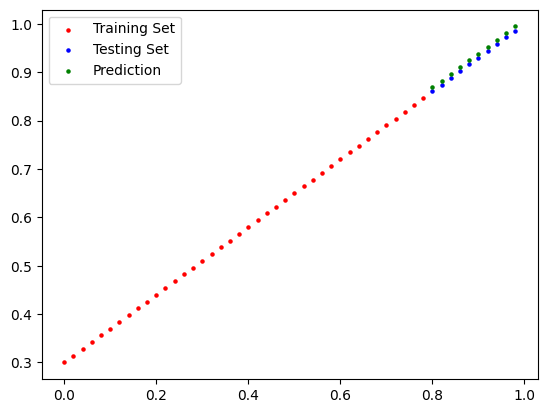

In [11]:
# visualize the prediction in inference mode
with torch.inference_mode():
  y_pred = model(X_test)
  plot_prediction(y_pred=y_pred)

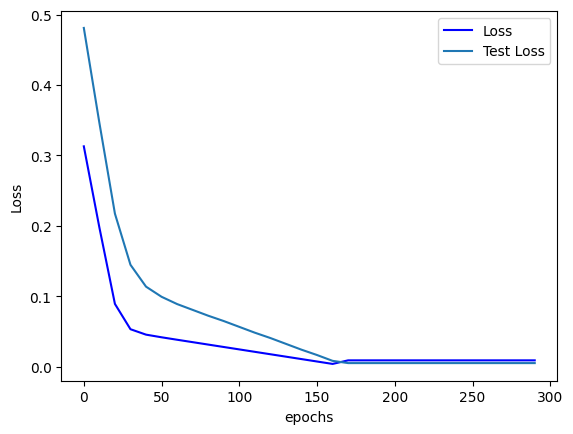

In [12]:
# visualize the loss curve and test loss curve to make sure there is no overfitting
def plot_loss_curve(epochs, loss, test_loss):
  plt.plot(epochs, loss, c='b', label="Loss")
  plt.plot(epochs, test_loss, label='Test Loss')
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_loss_curve(epoch_count, loss_values, test_loss_values)

##Save the state dict of a model

In [14]:
from pathlib import Path
# Create model dir
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [15]:
# save the model's state dict in .pt or .pth format
MODEL_SAVE_PATH = 'models/01_pytorch_workflow_model.pt'
torch.save(model.state_dict(), MODEL_SAVE_PATH)

## Load state dict from .pt file

In [16]:
# create a new model
loaded_model = LinearRegressionModel()
# load state dict from file
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [17]:
# check the state dict
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])